<p align="center">
  <br/>
    <img alt="ScaleDP" src="https://stabrise.com/media/filer_public_thumbnails/filer_public/4a/7d/4a7d97c2-50d7-4b7a-9902-af2df9b574da/scaledplogo.png__1000x300_subsampling-2.webp" width="376" style="max-width: 100%;">
  <br/>
</p>

<p align="center">
    <a target="_blank" href="https://colab.research.google.com/github/StabRise/scaledp-tutorials/blob/master/1.QuickStart.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://pypi.org/project/scaledp/" alt="Package on PyPI"><img src="https://img.shields.io/pypi/v/scaledp.svg" /></a>    
    <a href="https://github.com/stabrise/scaledp/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/scaledp.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=007D8A"></a>
</p>

## Start Spark Session with ScaleDP

In [1]:
from scaledp import *

spark = ScaleDPSession()
spark

24/12/02 08:53:03 WARN Utils: Your hostname, nmelnik-1-0 resolves to a loopback address: 127.0.1.1; using 192.168.43.137 instead (on interface wlo1)
24/12/02 08:53:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/02 08:53:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/02 08:53:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/12/02 08:53:04 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.



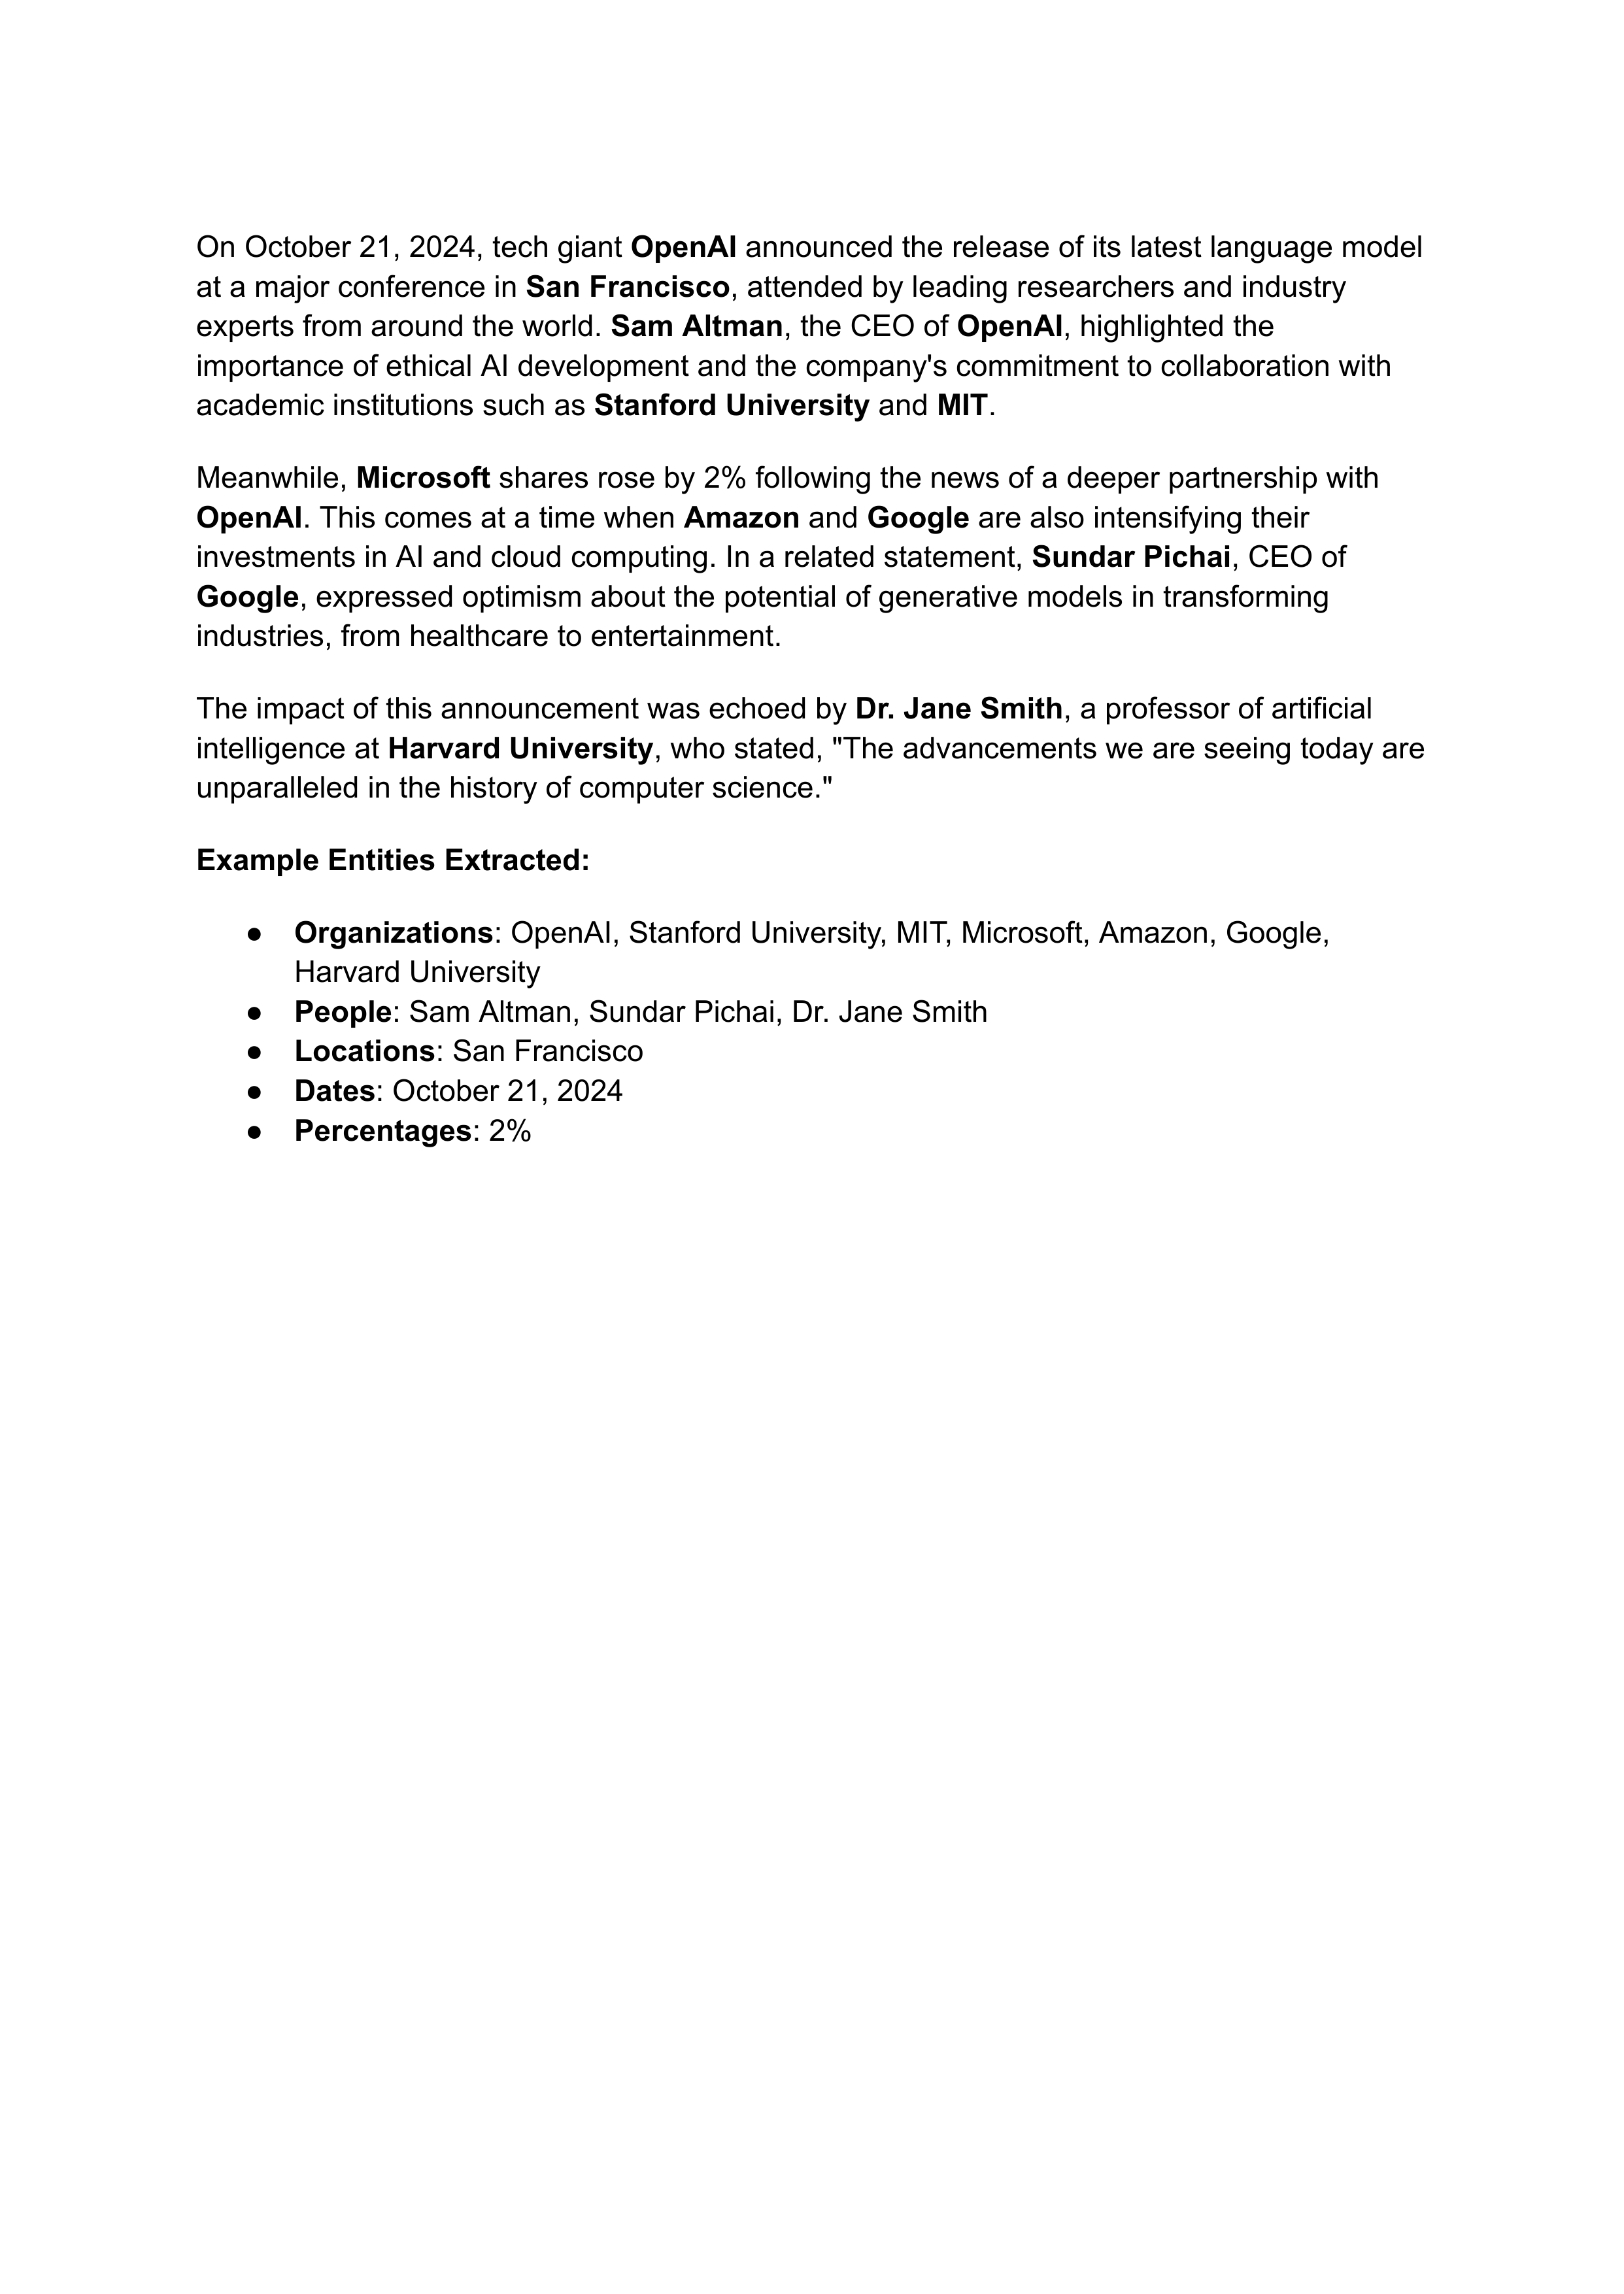

In [2]:
pdf_example = files('resources/pdfs/example.pdf')

df = spark.read.format("binaryFile") \
    .load(pdf_example)

df.show_pdf()

In [3]:
pipeline = PipelineModel(stages=[PdfDataToImage(inputCol="content", outputCol="image"),
                                 TesseractOcr(inputCol="image", outputCol="text", psm=PSM.SPARSE_TEXT,
                                              scoreThreshold=0.5, keepFormatting=True, keepInputData=True),])

result = pipeline.transform(df).cache()

result.show()


+--------------------+--------------------+------+----+--------------------+--------------------+
|                path|    modificationTime|length|page|               image|                text|
+--------------------+--------------------+------+----+--------------------+--------------------+
|file:/home/nmelni...|2024-11-18 19:06:...| 48025|   0|{file:/home/nmeln...|{file:/home/nmeln...|
+--------------------+--------------------+------+----+--------------------+--------------------+


In [7]:
result.select("text").show_text()

In [5]:
print(result.select("text.text").collect()[0][0])





             On October 21, 2024, tech giant OpenAl announced the release of its latest language model
             at a major conference in San Francisco, attended by leading researchers and industry
             experts from around the world. Sam Altman, the CEO of OpenAl, highlighted the
             importance of ethical Al development and the company's commitment to collaboration with
             academic institutions such as Stanford University and MIT.
             Meanwhile, Microsoft shares rose by 2% following the news of a deeper partnership with
                      This comes at a time when Amazon and Google are also intensifying their
             investments in Al and cloud computing. In a related statement, Sundar Pichai, CEO of
             Google, expressed optimism about the potential of generative models in transforming
             industries, from healthcare to entertainment.
             The impact of this announcement was echoed by Dr. Jane Smith, a profes